# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em 

- MORETTIN, P. A.; TOLOI, C. M. C.. Análise de séries temporais: modelos lineares univariados. 3. ed. São Paulo: Blucher, 2018.

- EHLERS, R.S. Análise de Séries Temporais. ICMC USP. 2009.


Implementações:

- BROWNLEE, J. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- HYNDMAN, R. J., ATHANASOPOULOS, G.; Forecasting: principle and practice: O Texts; 2nd edition. 2018. Acesso em 09/07/2022.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\mbox{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$ 

## Aplicação

In [ ]:
!pip install statsmodels==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


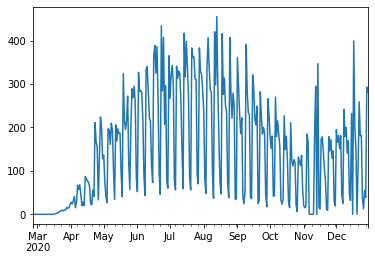

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

covidSP = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [ ]:
covidSP.index.max()


Timestamp('2020-12-30 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

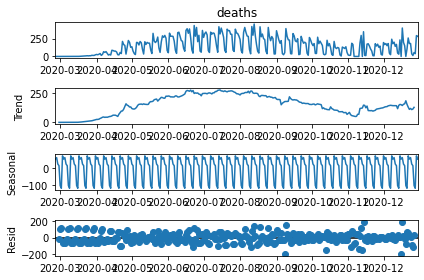

In [ ]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

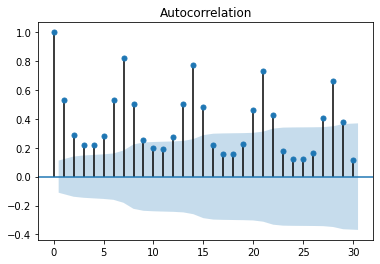

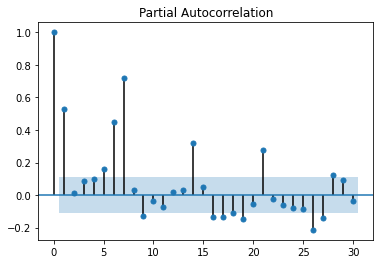

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [ ]:
# Ajuste de modelo SARIMA 
# No google colab o auto_arima retorna outro modelo como o escolhido, o que pode acontecer pois
# estamos utilizando outra versão do pacote e a busca pela melhor configuração do modelo pode
# acontecer em direções distintas. Vamos seguir nas análises seguintes com o
# modelo escolhido no Jupyter notebook para ficar homogêneo para a aula.

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.58 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=1.39 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=2.43 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.87 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.29 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=2.20 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.66 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=1.40 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  309
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -1683.045
Date:                                Thu, 28 Jul 2022   AIC                           3380.090
Time:                                        21:55:21   BIC                           3406.201
Sample:                                             0   HQIC                          3390.531
                                                - 309                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0722      0.044     -1.640      0.101      -0.158       0.014
ma.L1         -0.9108      0.026    -34.947      0.000      -0.962      -0.860
ar.S.L7        1.7757      0.132     13.488      0.000       1.518       2.034
ar.S.L14      -0.7893      0.127     -6.210      0.000      -1.038      -0.540
ma.S.L7       -1.5615      0.113    -13.851      0.000      -1.782      -1.340
ma.S.L14       0.6824      0.072      9.490      0.000       0.541       0.823
sigma2      3138.0097    152.571     20.568      0.000    2838.976    3437.044
===================================================================================
Ljung-Box (Q):                       45.88   Jarque-Bera (JB):               388.94
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(covidSP)

309

In [ ]:
len(covidSP)*0.9

278.1

In [ ]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [ ]:
modelo = SARIMAX(treino['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Thu, 28 Jul 2022   AIC                           3016.188
Time:                                   21:55:23   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.831      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.002      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5014    135.109     21.727      0.000    2670.693    3200.309
===================================================================================
Ljung-Box (Q):                       49.51   Jarque-Bera (JB):               544.31
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
resultado.fittedvalues

2020-02-26      0.000000
2020-02-27      0.000000
2020-02-28      0.000000
2020-02-29      0.000000
2020-03-01      0.000000
                 ...    
2020-11-25    169.507755
2020-11-26    171.826936
2020-11-27     75.707126
2020-11-28    134.617235
2020-11-29     23.737224
Freq: D, Length: 278, dtype: float64

In [ ]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False).rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [ ]:
previsões

2020-11-30     20.603852
2020-12-01    133.815078
2020-12-02    162.274919
2020-12-03    173.645720
2020-12-04     98.627125
2020-12-05    138.719387
2020-12-06     28.732641
2020-12-07     24.062874
2020-12-08    133.331036
2020-12-09    160.799642
2020-12-10    171.774406
2020-12-11     99.368654
2020-12-12    138.064532
2020-12-13     31.908544
2020-12-14     27.401421
2020-12-15    132.863853
2020-12-16    159.375748
2020-12-17    169.968269
2020-12-18    100.084356
2020-12-19    137.432485
2020-12-20     34.973832
2020-12-21     30.623689
2020-12-22    132.412942
2020-12-23    158.001447
2020-12-24    168.225038
2020-12-25    100.775130
2020-12-26    136.822452
2020-12-27     37.932358
2020-12-28     33.733728
2020-12-29    131.977736
2020-12-30    156.675012
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [ ]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=20.60385233, expected=19.0
predicted=133.8150778, expected=195.0
predicted=162.2749188, expected=166.0
predicted=173.6457196, expected=181.0
predicted=98.6271247 , expected=151.0
predicted=138.7193874, expected=181.0
predicted=28.73264124, expected=46.0
predicted=24.06287449, expected=25.0
predicted=133.3310362, expected=242.0
predicted=160.7996419, expected=179.0
predicted=171.774406 , expected=200.0
predicted=99.36865366, expected=141.0
predicted=138.0645323, expected=169.0
predicted=31.90854366, expected=47.0
predicted=27.40142145, expected=32.0
predicted=132.8638535, expected=232.0
predicted=159.3757478, expected=0.0
predicted=169.968269 , expected=399.0
predicted=100.0843557, expected=197.0
predicted=137.4324853, expected=151.0
predicted=34.97383173, expected=0.0
predicted=30.62368927, expected=107.0
predicted=132.4129423, expected=259.0
predicted=158.0014468, expected=181.0
predicted=168.2250383, expected=182.0
predicted=100.7751304, expected=37.0
predicted=136.8224521,

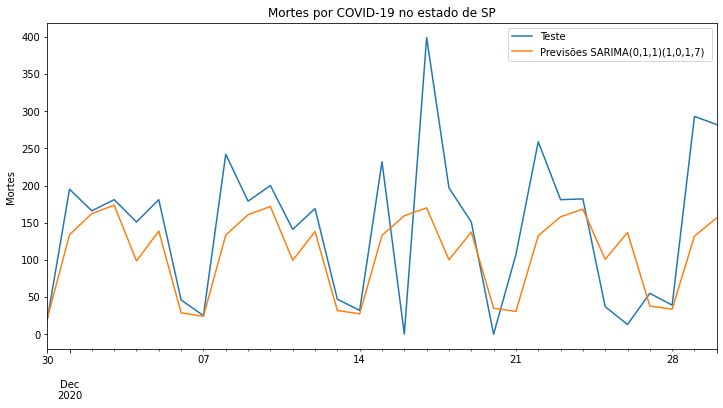

In [ ]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

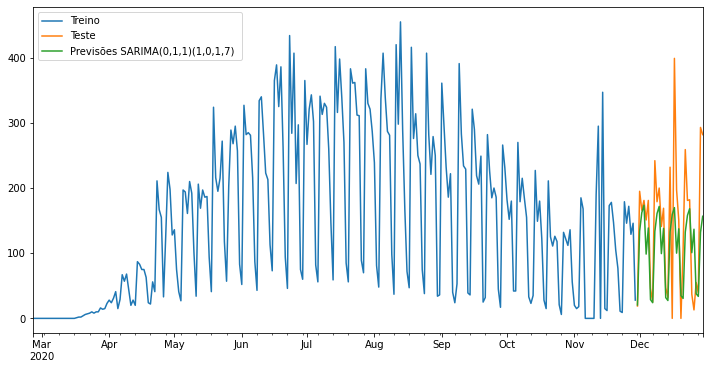

In [ ]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [ ]:
# Notem o uso de "trend", vejam o help para outras variações = Aqui tem mais uma possibilidade para buscar o melhor ajuste.

modelo = SARIMAX(covidSP['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7), trend='c')
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14).rename('Previsões SARIMA(1,0,1)(1,0,1,7)')

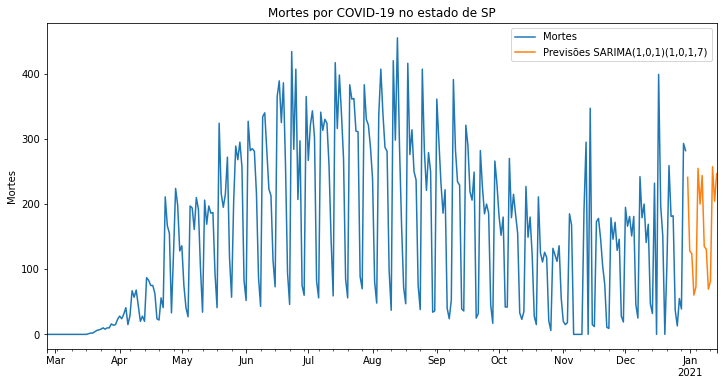

In [ ]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

## Diagnóstico em modelos SARIMA

### Métricas

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 6675.253219


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 81.70222285


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [ ]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [ ]:
resíduos.describe()

count    309.000000
mean      -0.376586
std       57.008284
min     -291.854799
25%      -24.505913
50%       -1.613628
75%       23.350884
max      306.679215
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fcee7ab0390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcee82be750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcee7ac77d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcee7a8b310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcee7ab08d0>,
  <matplotlib.lines.Line2D at 0x7fcee7ab0e90>]}

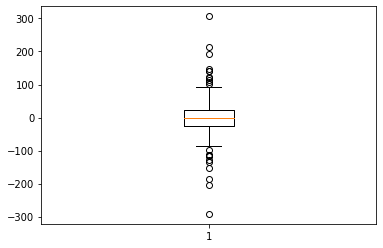

In [ ]:
plt.boxplot(resíduos)

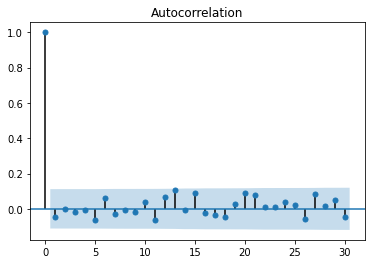

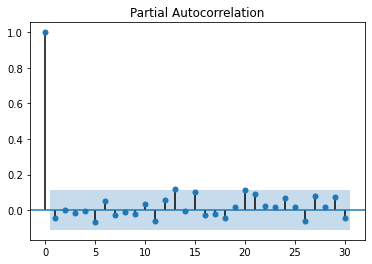

In [ ]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

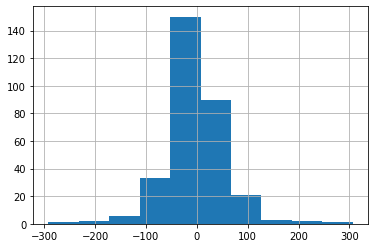

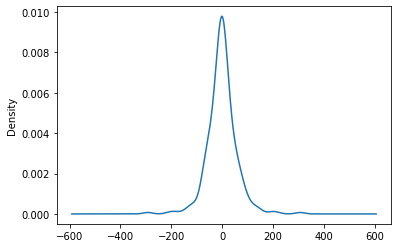

In [ ]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

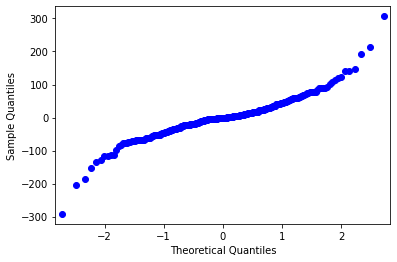

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**